# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [6]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


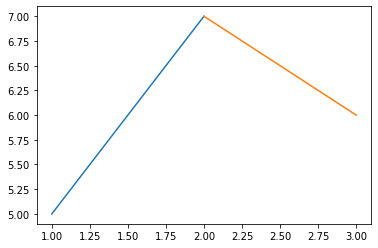

In [7]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


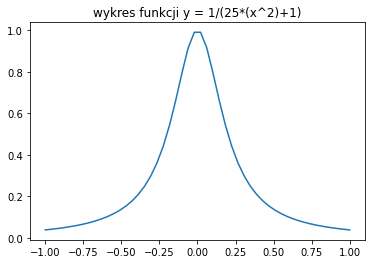

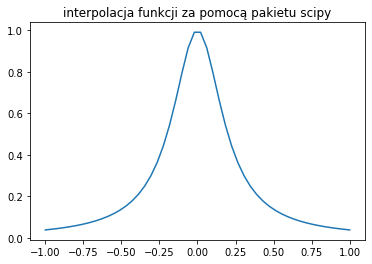

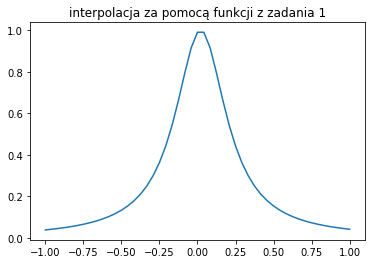

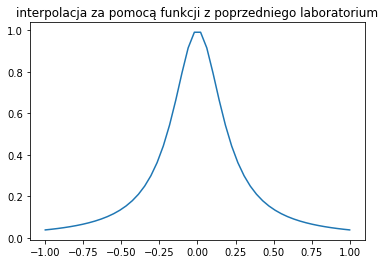

In [47]:
fx1 = lambda x: 1/(25*(x**2)+1)
x = np.linspace(-1,1)
y = fx1(x)
plt.plot(x, y)
plt.title("wykres funkcji y = 1/(25*(x^2)+1)")
plt.show()

# Interpolacja za pomocą pakietu scipy:

tck, u = splprep([x, y], s=0)
new_points = splev(u, tck)
plt.plot(new_points[0], new_points[1])
plt.title("interpolacja funkcji za pomocą pakietu scipy")
plt.show()

# Interpolacja za pomocą funkcji z pierwszego zadania

a, b = main.first_spline(x, y)
x_main = np.linspace(x[0], x[-1], len(x)-1)
y_main = []
for i in range(len(x)-1):
    y_main.append(a[i] * x[i] + b[i])
plt.plot(x_main, y_main)
plt.title("interpolacja za pomocą funkcji z zadania 1")
plt.show()

#interpolacja za pomocą funkcji z poprzedniego laboratorium

wezly = main.chebyshev_nodes(1000)
wagi = main.bar_czeb_weights(1000)
nodes = fx1(wezly)
y_main_lab4 = main.barycentric_inte(wezly, nodes, wagi, x)
plt.plot(x, y_main_lab4)
plt.title("interpolacja za pomocą funkcji z poprzedniego laboratorium")
plt.show()

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


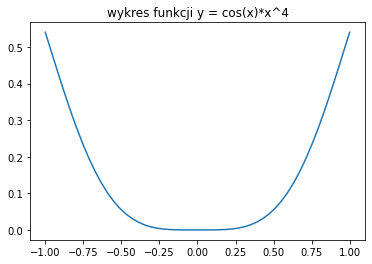

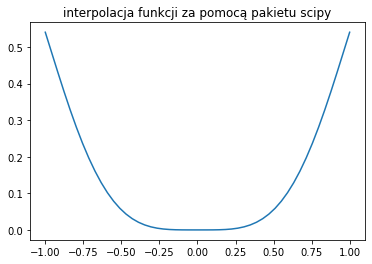

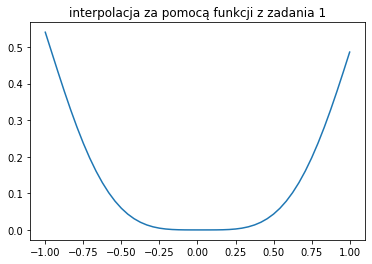

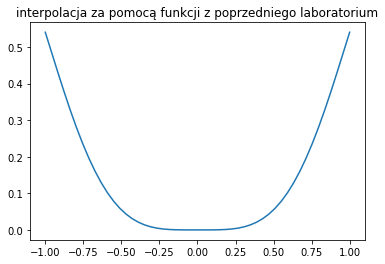

In [36]:
fx2 = lambda x: np.cos(x)*x**4
x = np.linspace(-1,1)
y = fx2(x)
plt.plot(x, y)
plt.title('wykres funkcji y = cos(x)*x^4')
plt.show()

# Interpolacja za pomocą pakietu scipy:

tck, u = splprep([x, y], s=0)
new_points = splev(u, tck)
plt.plot(new_points[0], new_points[1])
plt.title("interpolacja funkcji za pomocą pakietu scipy")
plt.show()

# Interpolacja za pomocą funkcji z pierwszego zadania

a, b = main.first_spline(x, y)
x_main = np.linspace(x[0], x[-1], len(x)-1)
y_main = []
for i in range(len(x)-1):
    y_main.append(a[i] * x[i] + b[i])
plt.plot(x_main, y_main)
plt.title("interpolacja za pomocą funkcji z zadania 1")
plt.show()

#interpolacja za pomocą funkcji z poprzedniego laboratorium

wezly = main.chebyshev_nodes(1000)
wagi = main.bar_czeb_weights(1000)
nodes = fx2(wezly)
y_main_lab4 = main.barycentric_inte(wezly, nodes, wagi, x)
plt.plot(x, y_main_lab4)
plt.title("interpolacja za pomocą funkcji z poprzedniego laboratorium")
plt.show()

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.